In [14]:

import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import torch
from torch.distributions import RelaxedOneHotCategorical

import sys
sys.path.append('./..')
from logistic import DLogistic, Logistic

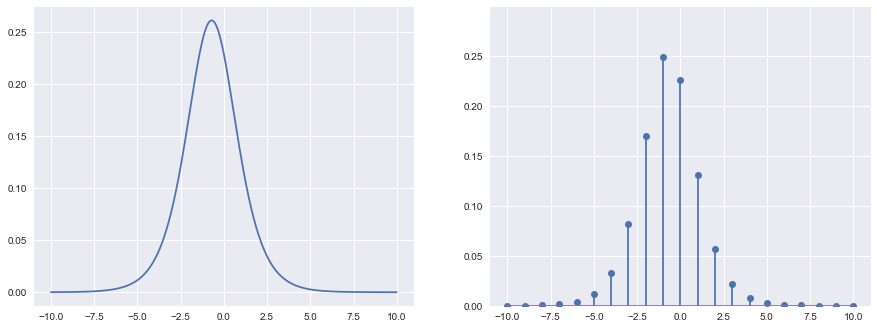

tensor(1.)


In [17]:
# Generate random logistic + rectified dlogistic
loc = torch.randn(1, 1)
scale = torch.rand(1, 1) * 2
alpha = 1
g0 = -10
gk = 10
d = DLogistic(loc, scale, alpha, g0, gk)
x = torch.arange(g0, gk + 1).view(1, -1)
p = d.pmf(x)

d2 = Logistic(loc, scale)
x2 = torch.linspace(-10, 10, 1000).view(1, -1)
p2 = d2.log_prob(x2).exp()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
ax1.plot(x2[0], p2[0])
ax2.stem(x[0], p[0])
ax2.set_ylim([0, p.max() + 0.05])
plt.show()
print(torch.sum(p))

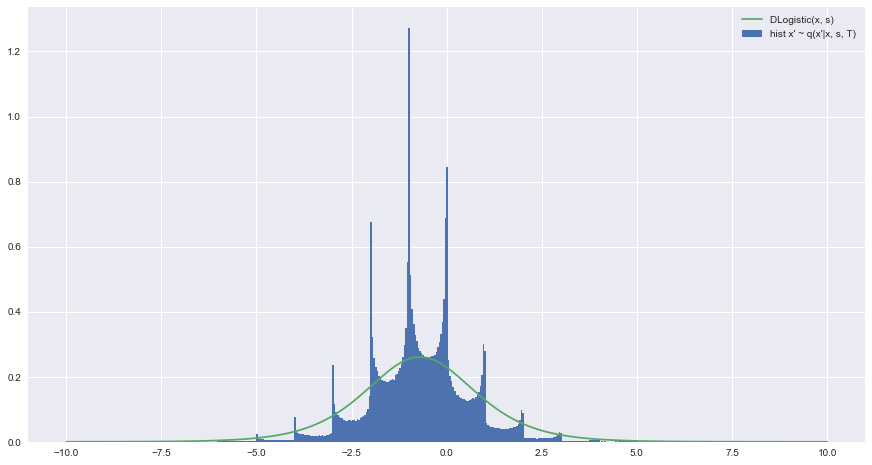

In [19]:
# Given input x, a learnt scale s, and static quantization grid G:
# x' = (z ~ Concrete(z | \pi, T) \dot G)
# Where \pi = DLogistic(x, s)

# Visualize q(x' | x, s, T) with hist
n_samples = 1000000
temperature = 0.5
dist = RelaxedOneHotCategorical(torch.Tensor([temperature]), p[0])
s = dist.sample(torch.Size([n_samples]))
result = (s * x).sum(-1)

plt.figure(figsize=(15, 8))
plt.hist(result, bins=500, normed=True, label="hist x' ~ q(x'|x, s, T)")
plt.plot(x2[0], p2[0], label="DLogistic(x, s)")
plt.legend()
plt.show()